<h1>    SIMPLE LINEAR REGRESSION  </h1>

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required 

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading data from remote link

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#check the rows,columns of dataset
data.shape

(25, 2)

In [6]:
#check the null values of dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# VISUALIZING DATA

<Figure size 720x720 with 0 Axes>

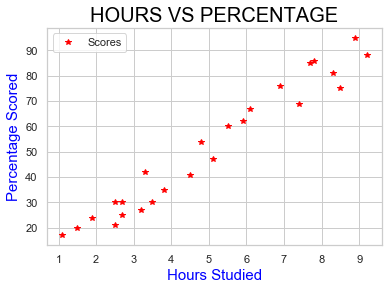

In [7]:
# Plotting the distribution of scores

sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
data.plot(x='Hours', y='Scores', style='o', marker='*',c='red')  
plt.title('HOURS VS PERCENTAGE', fontname='Arial', color='black', fontsize='20')  
plt.xlabel('Hours Studied', fontname='Arial', color='blue', fontsize='15')  
plt.ylabel('Percentage Scored', fontname='Arial', color='blue', fontsize='15')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# CHECKING OUTLIERS

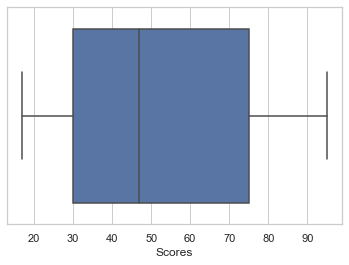

In [8]:
plt.figure()
sns.boxplot(x='Scores',data=data)

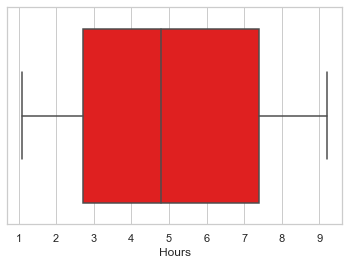

In [9]:
plt.figure()
sns.boxplot(x='Hours',data=data,color='red')

# BUILDING THE MODEL
# 1.Preparing the data
- The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
x=data.iloc[:,:-1].values
y=data.iloc[:, 1].values

In [11]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

 - Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
 - We'll do this by using Scikit-Learn's built-in train_test_split() method.
 - The training and testing data is divided in the ratio 70:30
    

In [13]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 2.Training the Algorithm
- We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [14]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 
print("Training complete.")

Training complete.


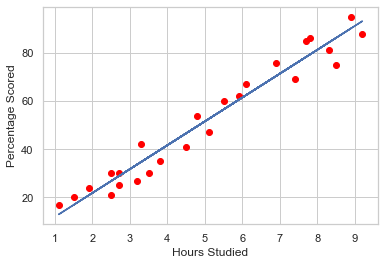

In [15]:
# Plotting the regression line with coefficient and intercept
line = lr.coef_*x+ lr.intercept_

# Plotting for the test data
sns.set(style='whitegrid')
plt.scatter(x, y,color='red')
plt.plot(x, line)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

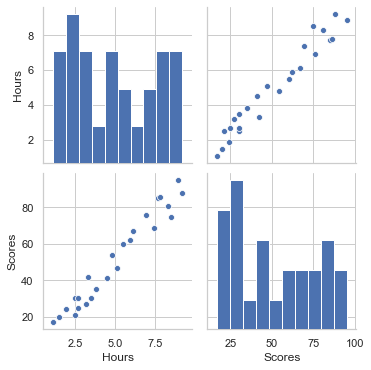

In [16]:
sns.set(style='whitegrid')
sns.pairplot(data)

# 3.Testing the Algorithm
 - Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
print(x_test)                        # Testing data - In Hours
y_pred = lr.predict(x_test)          # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual vs Predicted Score

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


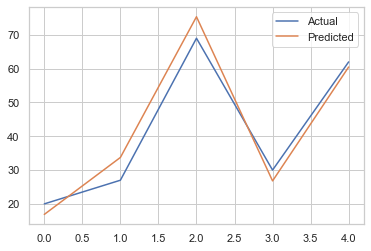

In [19]:
df.plot(kind='line',label='Actual',)
plt.legend()

<h3> What will be the predicted score if a student study for 9.25 hrs in a day?</h3>

In [20]:
hours = 9.25
my_prediction = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# 4.Evaluating the Model
 - The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different    algorithms perform on a particular dataset. 
 - For simplicity here, we have chosen the mean square error and the root mean squared error.There are many such metrics for        evaluation.

In [21]:
from sklearn import metrics  
mse=metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mse) 

Mean Absolute Error: 4.183859899002975


In [22]:
print('Root Mean Squared Error:', np.sqrt(mse))

Root Mean Squared Error: 2.0454485813637495
